# 부산 지하철 이용객 분석

### **링크 기록**
- [부산데이터 홈페이지](https://data.busan.go.kr/) 접속
- 승하차 인원 검색(시간대별 승하차 인원 - 20240930.csv)

### 3대장 분석기
1. *matplotlib* = 시각화도구
2. *pandas* = 데이터프레임
3. *(numpy)* = 숫자,행렬

In [1]:
# !pip install matplotlib
# !pip install pandas
# !pip install squarify
# !pip install numpy

In [2]:
# 시각화 도구
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 프레임
import pandas as pd

# import squartify

### 차트 스타일

In [3]:
# 차트 스타일
plt.style.use('fivethirtyeight')
# 폰트 설정
d2coding_path = 'D2Coding/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'

# 마이너스 부호 설정
matplotlib.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [4]:
file_path = '../dataset/일별 역별 시간대별 승하차(2024년 5월).csv'
data = pd.read_csv(file_path, encoding='EUC-KR')
data.columns

Index(['역번호', '역명', '년월일', '요일', '구분', '합계', '01시-02시', '02시-03시', '03시-04시',
       '04시-05시', '05시-06시', '06시-07시', '07시-08시', '08시-09시', '09시-10시',
       '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시',
       '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시',
       '22시-23시', '23시-24시', '24시-01시'],
      dtype='object')

In [5]:
columns = ['num', 'stationName', 'date', 'week', 'type', 'total']
time_tab_col = [ f'{i}H~{i+1}H' for i in range(1, 24) ] + ['24~1H']
columns += time_tab_col
# print(columns)

In [6]:
# sets = pd.Index(columns)
# print(sets)
data.columns = columns
data.count()

num            34048
stationName    34048
date           34048
week           34048
type           34048
total          34048
1H~2H          34048
2H~3H          34048
3H~4H          34048
4H~5H          34048
5H~6H          34048
6H~7H          34048
7H~8H          34048
8H~9H          34048
9H~10H         34048
10H~11H        34048
11H~12H        34048
12H~13H        34048
13H~14H        34048
14H~15H        34048
15H~16H        34048
16H~17H        34048
17H~18H        34048
18H~19H        34048
19H~20H        34048
20H~21H        34048
21H~22H        34048
22H~23H        34048
23H~24H        34048
24~1H          34048
dtype: int64

In [7]:
# gdata = data.groupby(['num', 'stationName', 'week', 'date']).sum() # 그룹 후 승하차 구분 하나로 합산
gdata = data.groupby(['num', 'stationName', 'week', 'date']).sum().reset_index() # 합산 후 인덱스 초기화
# gdata.head()
gdata[gdata['date']=='2024-05-01']
# gdata['date']=='2024-01-01'

,num,stationName,week,date,type,total,1H~2H,2H~3H,3H~4H,4H~5H,...,15H~16H,16H~17H,17H~18H,18H~19H,19H~20H,20H~21H,21H~22H,22H~23H,23H~24H,24~1H
61,95,다대포해수욕장,수,2024-05-01,승차하차,9613,0,3,0,15,...,850,859,661,469,402,325,241,181,112,57
213,96,다대포항,수,2024-05-01,승차하차,6791,0,0,0,8,...,586,550,501,461,254,203,182,147,67,23
365,97,낫개,수,2024-05-01,승차하차,8757,0,0,0,19,...,645,690,706,627,361,340,287,234,173,45
517,98,신장림,수,2024-05-01,승차하차,5730,0,0,0,4,...,434,471,409,322,240,192,139,132,100,25
669,99,장림,수,2024-05-01,승차하차,7249,0,0,0,7,...,620,597,538,457,235,222,311,143,102,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16325,410,석대,수,2024-05-01,승차하차,334,0,0,0,0,...,33,19,14,19,10,2,1,2,0,4
16477,411,영산대,수,2024-05-01,승차하차,5094,0,0,0,4,...,346,385,421,293,160,160,115,118,89,30
16629,412,윗반송,수,2024-05-01,승차하차,4743,0,0,0,13,...,344,340,376,278,187,118,109,71,41,28
16781,413,고촌,수,2024-05-01,승차하차,1100,0,0,0,3,...,69,89,80,78,43,32,14,16,3,4


In [8]:
# 각 역마다 일자별 정리
mdata = gdata[ gdata['date'] >= '2024-05-01' ][gdata['total']>=20000][['stationName', 'date', 'total', 'week']]
mdata = mdata.sort_values(by=['stationName', 'date'], ascending=[1, 0])
mdata.head()

C:\Users\penta\AppData\Local\Temp\ipykernel_8872\1459019961.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mdata = gdata[gdata['date']>='2024-05-01'][gdata['total']>=20000][['stationName', 'date', 'total', 'week']]


,stationName,date,total,week
9445,개금,2024-05-31,20193,금
9575,개금,2024-05-28,20227,화
9511,개금,2024-05-27,20025,월
9574,개금,2024-05-21,20306,화
9443,개금,2024-05-17,20363,금


In [9]:
# 데이터 날짜별로 통합
date = gdata[gdata['date']>='2024-05-01'].sort_values(by=['date', 'total', 'stationName'], ascending=[True, False, True])[['stationName', 'date', 'total']]
date.head(10)

,stationName,date,total
3709,서면,2024-05-01,76528
8877,서면,2024-05-01,51667
2493,남포,2024-05-01,41463
2797,부산역,2024-05-01,39972
10093,사상,2024-05-01,39086
2341,자갈치,2024-05-01,38496
6901,센텀시티,2024-05-01,34972
1125,하단,2024-05-01,34667
3861,부전,2024-05-01,34315
5077,부산대,2024-05-01,32972


In [10]:
# 역이름 기준으로 날짜 통합 + total 합치기
total = gdata[gdata['date']>='2024-05-01'].groupby(['stationName']).sum().sort_values(by='total',ascending=False).reset_index()[['stationName', 'total']]
total.head(20)

,stationName,total
0,서면,3910687
1,연산,1713640
2,부산역,1508595
3,사상,1417385
4,동래,1255221
5,남포,1225592
6,센텀시티,1221757
7,하단,1219325
8,자갈치,1155917
9,경성대부경대,1151742


In [11]:
from IPython.display import display, HTML

In [12]:
display(HTML(f'''
<div style='display: flex; font-size: 2rem; color: skyblue; column-gap: 0.5rem; background: #404; width: 180px; justify-content: center;'><a>aaa</a><a>bbb</a><a>ccc</a></div>
'''))

In [13]:
display(HTML(f'''
<div style='display: flex;'>
<div style='flex: 1; padding: 10px;'><h3>Total Popular</h3>{total.head(20).to_html(index=0)}</div>
<div style='flex: 1; padding: 10px;'><h3>Date Popular</h3>{date.head(20).to_html(index=0)}</div>
</div>
'''))

stationName,total
서면,3910687
연산,1713640
부산역,1508595
사상,1417385
동래,1255221
남포,1225592
센텀시티,1221757
하단,1219325
자갈치,1155917
경성대부경대,1151742


## 시각화

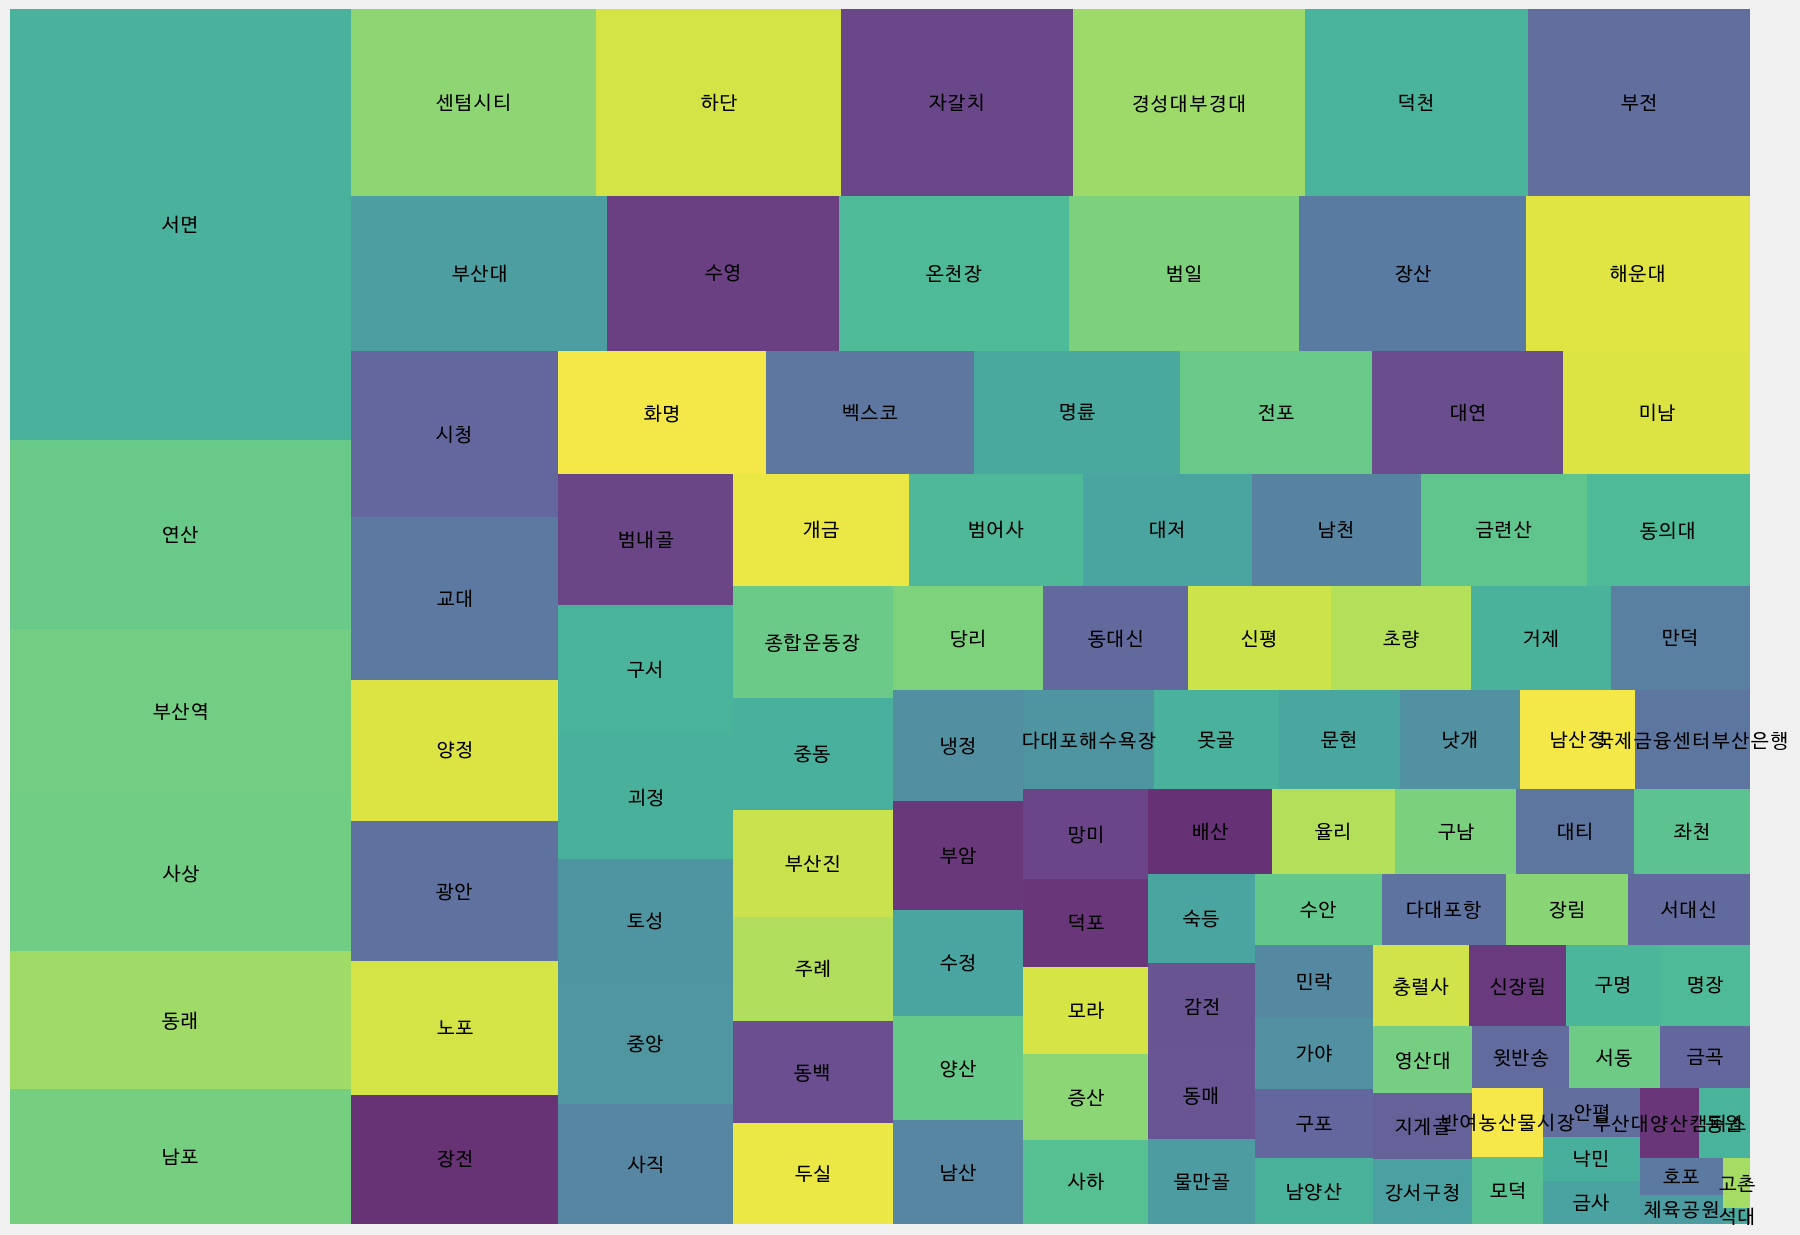

In [24]:
import squarify

plt.figure(figsize=(20, 15))
squarify.plot(sizes=total['total'], label=total.stationName, alpha=0.8)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

## 숙제(수도권 도시철도 데이터)

In [15]:
file_path = '../dataset/서울교통공사_역별 일별 시간대별 승하차인원 정보_20231231.csv'
data = pd.read_csv(file_path, encoding='EUC-KR')
data.columns

Index(['연번', '수송일자', '호선', '역번호', '역명', '승하차구분', '06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후'],
      dtype='object')

In [16]:
columns = ['id', 'date', 'lineNum', 'stationNum', 'stationName', 'type']
time_tab_col = ['~6H'] + [ f'{i}H~{i+1}H' for i in range(6, 24) ] + ['24H~']
columns += time_tab_col
data.columns = columns
data['total'] = data[time_tab_col].sum(axis=1)

In [17]:
data.head(20)

,id,date,lineNum,stationNum,stationName,type,~6H,6H~7H,7H~8H,8H~9H,...,16H~17H,17H~18H,18H~19H,19H~20H,20H~21H,21H~22H,22H~23H,23H~24H,24H~,total
0,1,2023-01-01,1호선,150,서울역,승차,215,145,231,594,...,2509,2696,2549,2462,2177,2190,1808,734,7,32023
1,2,2023-01-01,1호선,150,서울역,하차,154,636,595,939,...,2295,2526,1930,1897,1487,991,609,280,46,27044
2,3,2023-01-01,1호선,151,시청,승차,48,73,106,194,...,895,959,985,670,630,515,330,146,0,9317
3,4,2023-01-01,1호선,151,시청,하차,64,247,293,463,...,575,533,456,285,267,246,154,79,18,8300
4,5,2023-01-01,1호선,152,종각,승차,407,235,158,201,...,1402,1223,1272,911,913,906,602,232,3,13019
5,6,2023-01-01,1호선,152,종각,하차,69,164,268,384,...,890,807,564,391,267,207,149,136,15,10791
6,7,2023-01-01,1호선,153,종로3가,승차,220,171,121,155,...,1392,1338,1080,879,763,664,477,163,6,13016
7,8,2023-01-01,1호선,153,종로3가,하차,39,118,130,274,...,839,621,454,316,227,201,122,90,31,10898
8,9,2023-01-01,1호선,154,종로5가,승차,46,48,79,101,...,1010,1020,875,592,572,382,177,65,0,9878
9,10,2023-01-01,1호선,154,종로5가,하차,26,84,130,216,...,742,592,438,304,195,174,152,95,10,9018


In [18]:
data[data['total']==0]

,id,date,lineNum,stationNum,stationName,type,~6H,6H~7H,7H~8H,8H~9H,...,16H~17H,17H~18H,18H~19H,19H~20H,20H~21H,21H~22H,22H~23H,23H~24H,24H~,total
144,145,2023-01-01,3호선,321,충무로,승차,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,146,2023-01-01,3호선,321,충무로,하차,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
360,361,2023-01-01,6호선,2615,연신내,승차,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
361,362,2023-01-01,6호선,2615,연신내,하차,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236,1237,2023-01-03,3호선,321,충무로,승차,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197991,197992,2023-12-29,6호선,2615,연신내,하차,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198322,198323,2023-12-30,3호선,321,충무로,승차,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198323,198324,2023-12-30,3호선,321,충무로,하차,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198868,198869,2023-12-31,3호선,321,충무로,승차,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# data['total'] = data[time_tab_col].sum(axis=1)

In [20]:
gdata = data.groupby(['stationNum', 'lineNum', 'stationName']).sum().reset_index()[['stationNum', 'lineNum', 'stationName', 'total']] # 합산 후 인덱스 초기화
gdata.head(20)

,stationNum,lineNum,stationName,total
0,150,1호선,서울역,36716140
1,151,1호선,시청,17950406
2,152,1호선,종각,25984471
3,153,1호선,종로3가,18040693
4,154,1호선,종로5가,17337323
5,155,1호선,동대문,8355108
6,156,1호선,신설동,9530294
7,157,1호선,제기동,12252199
8,158,1호선,청량리(서울시립대입구),14717395
9,159,1호선,동묘앞,7190419


In [21]:
su_total = gdata[gdata['total']>0].sort_values(by=['total', 'stationNum'], ascending=[False, True]).reset_index()
#.merge(gdata[time_tab_col])
# su_total.head(50)
su_total.tail(15)

,index,stationNum,lineNum,stationName,total
258,199,2634,6호선,약수,2591577
259,167,2558,5호선,오금,2476965
260,203,2638,6호선,창신,2276207
261,146,2537,5호선,동대문역사문화공원(DDP),2221882
262,53,244,2호선,용답,2161673
263,179,2614,6호선,독바위,1989248
264,87,336,3호선,학여울,1778216
265,59,250,2호선,용두(동대문구청),1722031
266,198,2633,6호선,버티고개,1528510
267,116,431,4호선,동작(현충원),1461274


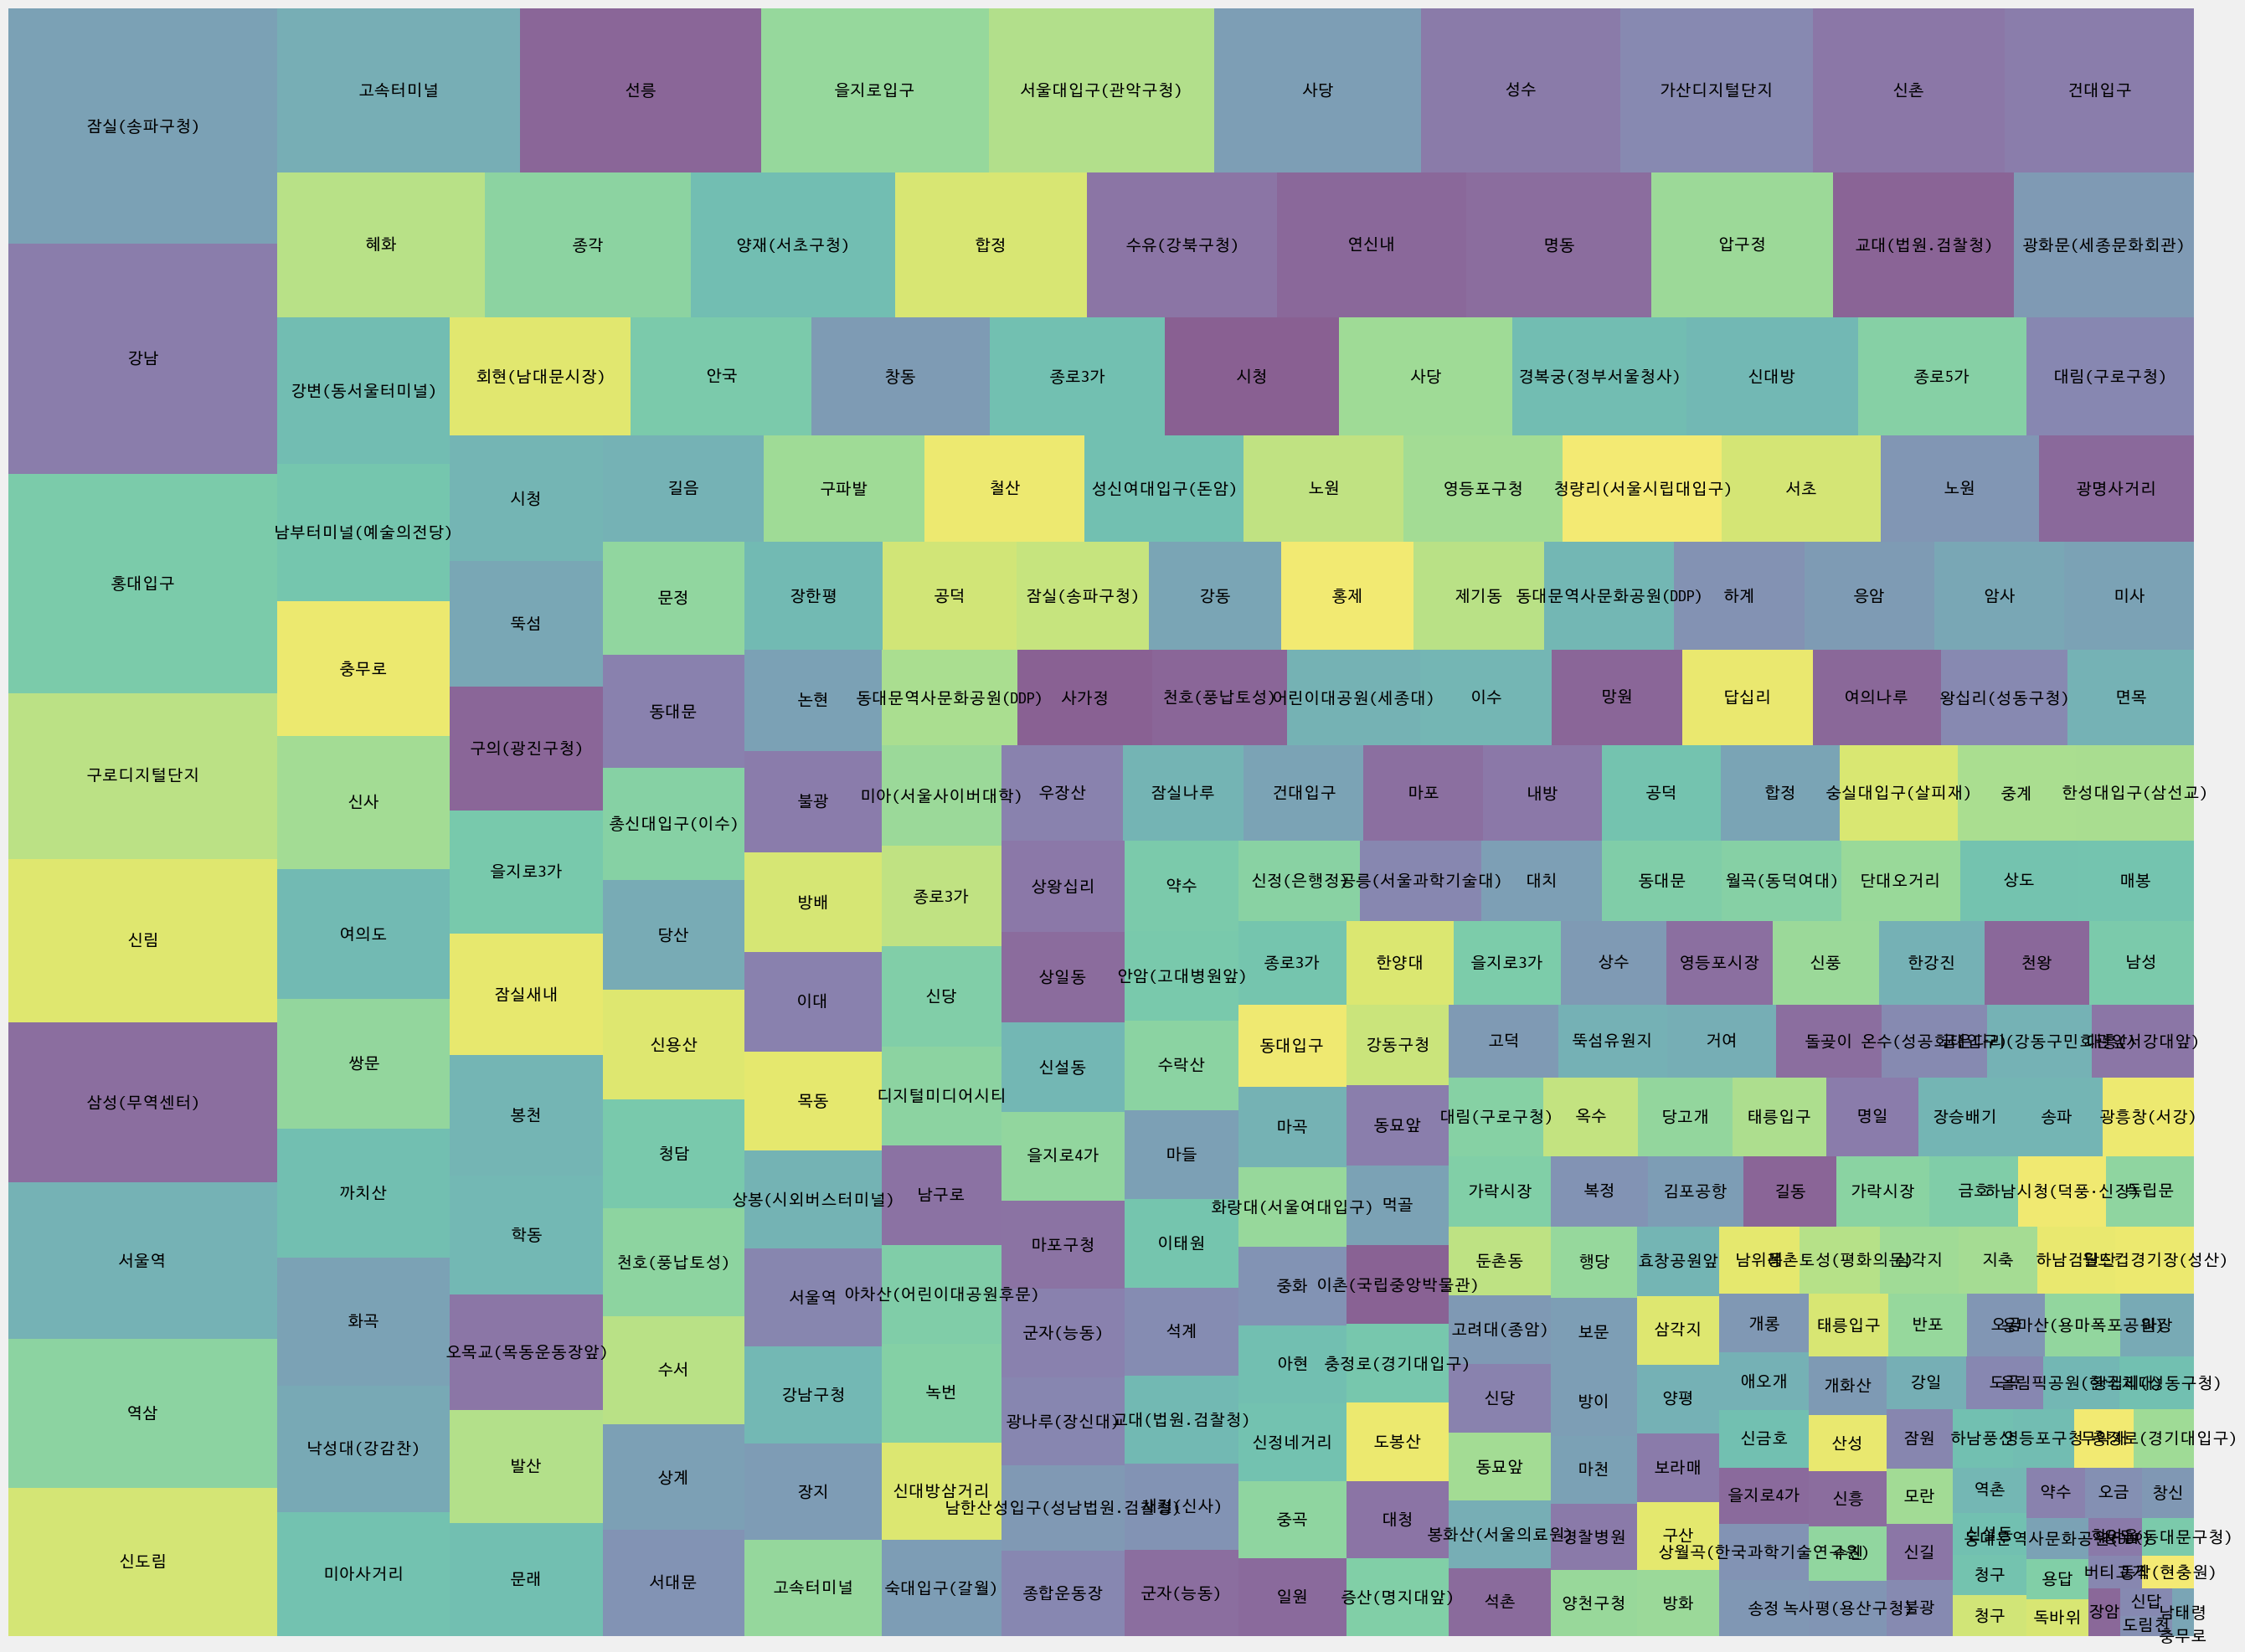

In [22]:
import squarify

plt.figure(figsize=(30, 24))
squarify.plot(sizes=su_total['total'], label=su_total.stationName, alpha=0.6)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()